# Data Sciences and GIS for Mobility

## Data Science challenge, Step 1

At first, we decided to compare the number of pickups and dropoffs around Barclay's on event and non-event days. We expect a significantly higher number of pickups and droppoffs at event days.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [2]:
events = pd.read_csv('barclays_events.tsv', delimiter='\t')
events['start_time'] = events['start_time'].apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d %H:%M"))
events = events.set_index('start_time')
del events['url']
events = events.fillna('')
events.head()

,title,description
start_time,,
2013-02-22 19:30:00,Brooklyn Nets vs Houston Rockets,"Lin-sanity (Jeremy Lin) and ""The Beard"" (James..."
2015-10-09 19:30:00,New York Islanders vs. Chicago Blackhawks,Make your dinner reservations today by calling...
2015-03-20 19:30:00,Brooklyn Nets vs. Milwaukee Bucks,
2013-11-18 19:30:00,Brooklyn Nets vs. Portland Trail Blazers,
2015-04-12 20:00:00,Stevie Wonder,"Legendary singer, songwriter, musician and pro..."


In [3]:
barclays_dropoffs = pd.read_csv('Aggregated_dropoffs_barclays_center.csv')

In [4]:
barclays_dropoffs.head()

,date,hour,minute,dropoffs
0,2009-01-01,0,0,11
1,2009-01-01,0,1,22
2,2009-01-01,1,0,22
3,2009-01-01,1,1,32
4,2009-01-01,2,0,28


In [5]:
barclays_dropoffs["datetime1"] = barclays_dropoffs["date"].map(str) +" "+ barclays_dropoffs['hour'].map(str) +":"+ barclays_dropoffs['minute'].map(str)
barclays_dropoffs['datetime2'] = barclays_dropoffs['datetime1'].apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d %H:%M"))

In [6]:
barclays_dropoffs['datetime'] = barclays_dropoffs['datetime2']
del barclays_dropoffs['datetime2']
del barclays_dropoffs['datetime1']
del barclays_dropoffs['date']
del barclays_dropoffs['hour']
del barclays_dropoffs['minute']
barclays_dropoffs.head()

,dropoffs,datetime
0,11,2009-01-01 00:00:00
1,22,2009-01-01 00:01:00
2,22,2009-01-01 01:00:00
3,32,2009-01-01 01:01:00
4,28,2009-01-01 02:00:00


In [7]:
barclays_dropoffs = barclays_dropoffs.set_index('datetime')

In [8]:
barclays_dropoffs.head()

,dropoffs
datetime,
2009-01-01 00:00:00,11
2009-01-01 00:01:00,22
2009-01-01 01:00:00,22
2009-01-01 01:01:00,32
2009-01-01 02:00:00,28


As Barclay's first opened on September 28, 2012, we would like to examine only the data from this day on. We use the drop() function in order to filter the date for being after September 28, 2012.

In [9]:
barclays_dropoffs = barclays_dropoffs.drop(barclays_dropoffs[barclays_dropoffs.index < dt.datetime(2012,9,28)].index)
barclays_dropoffs.head()

,dropoffs
datetime,
2012-09-28 00:00:00,64
2012-09-28 00:01:00,53
2012-09-28 01:00:00,59
2012-09-28 01:01:00,36
2012-09-28 02:00:00,32


In [10]:
barclays_dropoffs_on_date = pd.groupby(barclays_dropoffs,by=[barclays_dropoffs.index.date]).sum()
barclays_dropoffs_on_date.index.name = 'date'

/Users/GalinaJonat/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.groupby() is deprecated and will be removed Please use the Series.groupby() or DataFrame.groupby() methods
  """Entry point for launching an IPython kernel.


In [11]:
barclays_dropoffs_on_date.head()

,dropoffs
date,
2012-09-28,1145
2012-09-29,1416
2012-09-30,1346
2012-10-01,813
2012-10-02,670


In [12]:
event_days = events.index.date
type(event_days)

numpy.ndarray

In [13]:
def is_event_day(day):
    if day in event_days:
        return 1
    else:
        return 0

In [14]:
barclays_dropoffs_on_date['event_day'] = [is_event_day(d) for d in barclays_dropoffs_on_date.index.values]
barclays_dropoffs_on_date.head(20)

,dropoffs,event_day
date,,
2012-09-28,1145,1
2012-09-29,1416,1
2012-09-30,1346,1
2012-10-01,813,1
2012-10-02,670,1
2012-10-03,1014,1
2012-10-04,1082,1
2012-10-05,1082,1
2012-10-06,1360,1


In [15]:
def assign_color(x):
    if x==1:
        return 'red'
    else:
        return 'blue'

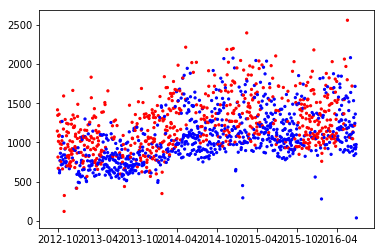

In [16]:
dropoff_colours=[assign_color(x) for x in barclays_dropoffs_on_date['event_day']]
plt.scatter(barclays_dropoffs_on_date.index, barclays_dropoffs_on_date['dropoffs'], c=dropoff_colours, s=5)
plt.show()

In [17]:
barclays_dropoffs_on_date.reset_index()

,date,dropoffs,event_day
0,2012-09-28,1145,1
1,2012-09-29,1416,1
2,2012-09-30,1346,1
3,2012-10-01,813,1
4,2012-10-02,670,1
5,2012-10-03,1014,1
6,2012-10-04,1082,1
7,2012-10-05,1082,1
8,2012-10-06,1360,1
9,2012-10-07,1093,1


In [18]:
barclays_pickups = pd.read_csv('Aggregated_pickups_barclays_center.csv')
barclays_pickups["datetime1"] = barclays_pickups["date"].map(str) +" "+ barclays_pickups['hour'].map(str) +":"+ barclays_pickups['minute'].map(str)
barclays_pickups['datetime2'] = barclays_pickups['datetime1'].apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d %H:%M"))
barclays_pickups.head()

,date,hour,minute,pickups,datetime1,datetime2
0,2009-01-01,0,0,7,2009-01-01 0:0,2009-01-01 00:00:00
1,2009-01-01,0,1,33,2009-01-01 0:1,2009-01-01 00:01:00
2,2009-01-01,1,0,40,2009-01-01 1:0,2009-01-01 01:00:00
3,2009-01-01,1,1,34,2009-01-01 1:1,2009-01-01 01:01:00
4,2009-01-01,2,0,49,2009-01-01 2:0,2009-01-01 02:00:00


In [19]:
barclays_pickups['datetime'] = barclays_pickups['datetime2']
del barclays_pickups['datetime2']
del barclays_pickups['datetime1']
del barclays_pickups['date']
del barclays_pickups['hour']
del barclays_pickups['minute']
barclays_pickups.head()

,pickups,datetime
0,7,2009-01-01 00:00:00
1,33,2009-01-01 00:01:00
2,40,2009-01-01 01:00:00
3,34,2009-01-01 01:01:00
4,49,2009-01-01 02:00:00


In [20]:
barclays_pickups = barclays_pickups.set_index('datetime')
barclays_pickups.head()

,pickups
datetime,
2009-01-01 00:00:00,7
2009-01-01 00:01:00,33
2009-01-01 01:00:00,40
2009-01-01 01:01:00,34
2009-01-01 02:00:00,49


In [21]:
barclays_pickups = barclays_pickups.drop(barclays_pickups[barclays_pickups.index < dt.datetime(2012,9,28)].index)
barclays_pickups.head()

,pickups
datetime,
2012-09-28 00:00:00,60
2012-09-28 00:01:00,45
2012-09-28 01:00:00,37
2012-09-28 01:01:00,26
2012-09-28 02:00:00,16


In [22]:
barclays_pickups_on_date = pd.groupby(barclays_pickups,by=[barclays_pickups.index.date]).sum()
barclays_pickups_on_date.index.name = 'date'

/Users/GalinaJonat/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.groupby() is deprecated and will be removed Please use the Series.groupby() or DataFrame.groupby() methods
  """Entry point for launching an IPython kernel.


In [23]:
barclays_pickups_on_date.head()

,pickups
date,
2012-09-28,930
2012-09-29,1438
2012-09-30,1365
2012-10-01,742
2012-10-02,571


In [24]:
barclays_pickups_on_date['event_day'] = [is_event_day(d) for d in barclays_pickups_on_date.index.values]

In [25]:
barclays_pickups_on_date.head()

,pickups,event_day
date,,
2012-09-28,930,1
2012-09-29,1438,1
2012-09-30,1365,1
2012-10-01,742,1
2012-10-02,571,1


In [26]:
#plots



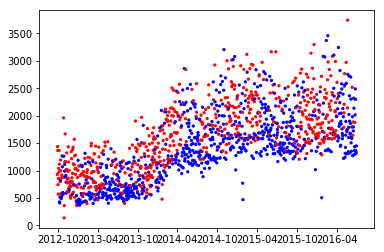

In [27]:
pickup_colours=[assign_color(x) for x in barclays_pickups_on_date['event_day']]
plt.scatter(barclays_pickups_on_date.index, barclays_pickups_on_date['pickups'], c=pickup_colours, s=5)
plt.show()

In [28]:
barclays_pickups_on_date = barclays_pickups_on_date.reset_index()

First conclusion: There does not seem to be a general trend of more pickups or dropoffs on event days.
However, we can see that the number of pickups has been rising since 2014.
##Todo: Why?? -maybe there are new offices in that area etc

Next step: Examine number of dropoffs and pickups around Barclay's in the course of a day (24 hours). We decide to examine all the days since we found out in the previous step that there does not seem to be a difference in the total number of pickups and dropoffs on event and non-event days.

Categorize events and comparing pickup patterns on different event category days

In [29]:
def findCategory(s1, s2):
    s1= s1.lower() # title
    s2 = s2.lower() # description
    # check if string has any keywords for sports events
    if (s1.find('basketball') >=0 or s1.find('boxing')>=0 or s1.find('hockey')>=0 or s1.find('vs')>=0 or 
       s2.find('basketball') >=0 or s2.find('boxing')>=0 or s2.find('hockey')>=0 or s2.find('vs')>=0):
        return 1 #define sports as category 1
    # check if string contains keywords for concerts
    if (s1.find('band')>=0 or s1.find('music')>=0 or s1.find('singer')>=0 or s1.find('grammy')>=0 or s1.find('album')>=0 or s1.find('concert')>=0 or
       s2.find('band')>=0 or s2.find('music')>=0 or s2.find('singer')>=0 or s2.find('grammy')>=0 or s2.find('album')>=0 or s2.find('concert')>=0):
        return 2

In [30]:
events['event_cat'] = events.apply(lambda row: findCategory(row['title'], row['description']), axis=1)
events = events.fillna(3)

In [31]:
events['date'] = [d.date() for d in events.index]

In [32]:
events.head(30)

,title,description,event_cat,date
start_time,,,,
2013-02-22 19:30:00,Brooklyn Nets vs Houston Rockets,"Lin-sanity (Jeremy Lin) and ""The Beard"" (James...",1.0,2013-02-22
2015-10-09 19:30:00,New York Islanders vs. Chicago Blackhawks,Make your dinner reservations today by calling...,1.0,2015-10-09
2015-03-20 19:30:00,Brooklyn Nets vs. Milwaukee Bucks,,1.0,2015-03-20
2013-11-18 19:30:00,Brooklyn Nets vs. Portland Trail Blazers,,1.0,2013-11-18
2015-04-12 20:00:00,Stevie Wonder,"Legendary singer, songwriter, musician and pro...",2.0,2015-04-12
2013-02-13 19:30:00,Brooklyn Nets vs Denver Nuggets,"During the last 1 1/2 seasons, the Denver Nugg...",1.0,2013-02-13
2014-11-09 15:30:00,Brooklyn Nets vs. Orlando Magic,,1.0,2014-11-09
2014-11-25 19:30:00,Progressive Legends Classic 2014,For the third consecutive season the Champions...,1.0,2014-11-25
2015-05-26 19:30:00,The Who,"p.fineprint { font-size:9px; } THE WHO, one ...",2.0,2015-05-26


In [33]:
barclays_dropoffs_on_date = barclays_dropoffs_on_date.reset_index()

In [34]:
mergedDropoffsandEvents = pd.merge(barclays_dropoffs_on_date, events, how='inner', on='date')

In [35]:
mergedDropoffsandEvents.head(20)

,date,dropoffs,event_day,title,description,event_cat
0,2012-09-28,1145,1,JAY Z,"Please note: doors open at 7pm. Hello, Brook...",2.0
1,2012-09-29,1416,1,JAY Z,"Please note: doors open at 7pm. Hello, Brook...",2.0
2,2012-09-30,1346,1,JAY Z,"Please note: doors open at 7pm. Hello, Brook...",2.0
3,2012-10-01,813,1,JAY Z,"Please note: doors open at 7pm. Hello, Brook...",2.0
4,2012-10-02,670,1,Islanders vs Devils,"adroll_adv_id = ""4OSUPK2YDJCG3GUHV6ZPNX""; adro...",1.0
5,2012-10-03,1014,1,JAY Z,"Please note: doors open at 7pm. Hello, Brook...",2.0
6,2012-10-04,1082,1,JAY Z,"Please note: doors open at 7pm. Hello, Brook...",2.0
7,2012-10-05,1082,1,JAY Z,"Please note: doors open at 7pm. Hello, Brook...",2.0
8,2012-10-06,1360,1,JAY Z,"Please note: doors open at 7pm. Hello, Brook...",2.0
9,2012-10-07,1093,1,Harlem Globetrotters,The Original Harlem Globetrottersare preparing...,1.0


In [36]:
def assign_3colors(x):
    if x==1: #sport
        return 'gold'
    if x==2: # concert
        return 'hotpink'
    else:
        return 'yellowgreen'

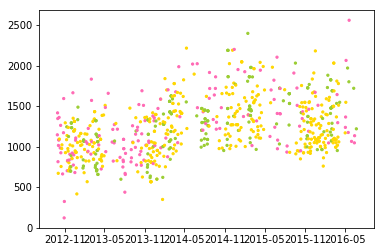

In [37]:
dropoffs_cat_colours=[assign_3colors(x) for x in mergedDropoffsandEvents['event_cat']]
plt.scatter(mergedDropoffsandEvents.date.values, mergedDropoffsandEvents['dropoffs'], c=dropoffs_cat_colours, s=5)
plt.show()

In [38]:
# not significant but slightly more dropoffs at concert days (upper bound)

In [39]:
eventAndNextDay = []
for d in event_days: 
    eventAndNextDay.append(d)
    eventAndNextDay.append(d + dt.timedelta(days=1))
    
eventAndNextDay

[datetime.date(2013, 2, 22),
 datetime.date(2013, 2, 23),
 datetime.date(2015, 10, 9),
 datetime.date(2015, 10, 10),
 datetime.date(2015, 3, 20),
 datetime.date(2015, 3, 21),
 datetime.date(2013, 11, 18),
 datetime.date(2013, 11, 19),
 datetime.date(2015, 4, 12),
 datetime.date(2015, 4, 13),
 datetime.date(2013, 2, 13),
 datetime.date(2013, 2, 14),
 datetime.date(2014, 11, 9),
 datetime.date(2014, 11, 10),
 datetime.date(2014, 11, 25),
 datetime.date(2014, 11, 26),
 datetime.date(2015, 5, 26),
 datetime.date(2015, 5, 27),
 datetime.date(2014, 2, 21),
 datetime.date(2014, 2, 22),
 datetime.date(2014, 8, 23),
 datetime.date(2014, 8, 24),
 datetime.date(2014, 12, 29),
 datetime.date(2014, 12, 30),
 datetime.date(2014, 3, 2),
 datetime.date(2014, 3, 3),
 datetime.date(2016, 1, 14),
 datetime.date(2016, 1, 15),
 datetime.date(2015, 2, 6),
 datetime.date(2015, 2, 7),
 datetime.date(2015, 9, 23),
 datetime.date(2015, 9, 24),
 datetime.date(2016, 3, 11),
 datetime.date(2016, 3, 12),
 datetime.

In [40]:
barclays_pickups_on_date.head()

,date,pickups,event_day
0,2012-09-28,930,1
1,2012-09-29,1438,1
2,2012-09-30,1365,1
3,2012-10-01,742,1
4,2012-10-02,571,1


In [41]:
def isAroundEvent(day):
    if (day in eventAndNextDay):
        return 1
    else:
        return 0

In [42]:
barclays_pickups_on_date['event_or_following_day'] = [isAroundEvent(d) for d in barclays_pickups_on_date.date]

In [48]:
barclays_pickups_on_date.head(20)

,date,pickups,event_day,event_or_following_day
0,2012-09-28,930,1,1
1,2012-09-29,1438,1,1
2,2012-09-30,1365,1,1
3,2012-10-01,742,1,1
4,2012-10-02,571,1,1
5,2012-10-03,858,1,1
6,2012-10-04,1038,1,1
7,2012-10-05,973,1,1
8,2012-10-06,1365,1,1
9,2012-10-07,1116,1,1


In [44]:
inDate = barclays_pickups_on_date['event_or_following_day'] ==1

In [45]:
barclays_pickups_around_event = barclays_pickups_on_date[inDate]

In [49]:
barclays_pickups_around_event.head(20)

,date,pickups,event_day,event_or_following_day
0,2012-09-28,930,1,1
1,2012-09-29,1438,1,1
2,2012-09-30,1365,1,1
3,2012-10-01,742,1,1
4,2012-10-02,571,1,1
5,2012-10-03,858,1,1
6,2012-10-04,1038,1,1
7,2012-10-05,973,1,1
8,2012-10-06,1365,1,1
9,2012-10-07,1116,1,1
